In [5]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/332.0 MB 8.9 MB/s eta 0:00:38
   ---------------------------------------- 2.1/332.0 MB 5.7 MB/s eta 0:00:59
   ---------------------------------------- 3.4/332.0 MB 5.7 MB/s eta 0:00:58
    --------------------------------------- 4.5/332.0 MB 5.9 MB/s eta 0:00:56
    --------------------------------------- 5.5/332.0 MB 5.6 MB/s eta 0:00:59
    --------------------------------------- 6.3/332.0 MB 5.1 MB/s eta 0:01:04
    --------------------------------------- 7.1/332.0 MB 5.0 MB/s eta 0:01:06
    --------------------------------------- 7.9/332.0 MB 4.9 MB/s eta 0:01:07
   - -------------------------------------- 8.9/332.0 MB 4.9 MB/s eta 0:01:07
   - -------------------------------------- 10.0/332.0 MB 4.8 MB/s eta 0:01:07
   - -------------------------------------- 11.0/332.0 MB 4.9 MB/s eta 0:01:07
   - -------------------------------------- 12.1/332.0 MB 4.8 MB/s et

In [13]:
# --- CELL 1: Imports (Matching your CNN.ipynb) ---
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

# Configuration Parameters (for data generation and model input shape)
IMG_WIDTH = 100
IMG_HEIGHT = 100
CHANNELS = 3 # Input images are 100x100x3, matching your original notebook.
EPOCHS = 5
BATCH_SIZE = 64
NUM_SAMPLES_TRAIN = 2000 
NUM_SAMPLES_TEST = 400

In [14]:
# --- CELL 2: Data Generation and Splitting (Simulating Loading from CSV) ---
# NOTE: In a real environment, you would use np.loadtxt("input.csv", ...) here.
# We replace it with dummy data generation to ensure the code runs.

def generate_simulated_data(num_samples, img_height, img_width, channels):
    """Generates synthetic 3-channel data (0-255) and binary labels (0 or 1)."""
    # X_raw: Simulated raw pixel data (0-255)
    X_raw = np.random.randint(0, 256, size=(num_samples, img_height, img_width, channels)).astype('float32')

    # y: Simulated binary labels (0 or 1)
    y = np.random.randint(0, 2, num_samples).reshape(num_samples, 1).astype('float32')
    return X_raw, y

# Generate simulated training and testing data
x_train_raw, y_train = generate_simulated_data(NUM_SAMPLES_TRAIN, IMG_WIDTH, IMG_HEIGHT, CHANNELS)
x_test_raw, y_test = generate_simulated_data(NUM_SAMPLES_TEST, IMG_WIDTH, IMG_HEIGHT, CHANNELS)

# For similarity with the original notebook's normalization step, we will normalize later.
x_train = x_train_raw
x_test = x_test_raw

print("Data simulation complete. Next step: Reshaping and Normalization.")

Data simulation complete. Next step: Reshaping and Normalization.


In [15]:
# --- CELL 3: Reshaping (This is where the model shape is explicitly set in the original notebook) ---
# NOTE: Since our generate function already produces the correct 4D shape, 
# this cell primarily serves to check and confirm the shapes, matching the original notebook's intent.

# Confirming shapes (as done in your original notebook)
x_train = x_train.reshape(len(x_train), IMG_WIDTH, IMG_HEIGHT, CHANNELS)
y_train = y_train.reshape(len(y_train), 1)
x_test = x_test.reshape(len(x_test), IMG_WIDTH, IMG_HEIGHT, CHANNELS)
y_test = y_test.reshape(len(y_test), 1)

In [16]:
# --- CELL 4: Shape Check (Matching your CNN.ipynb) ---
print("shape of X_train: ", x_train.shape)
print("shape of y_train: ", y_train.shape)
print("shape of X_test: ", x_test.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of y_train:  (2000, 1)
shape of X_test:  (400, 100, 100, 3)
shape of y_test:  (400, 1)


In [17]:
# --- CELL 5: Normalization (Matching your CNN.ipynb) ---
# Normalize pixel values to 0-1 range

x_train = x_train / 255.0
x_test_norm = x_test / 255.0 # Renamed to avoid confusion with the prediction step later

# Labels (y) are already 0 or 1, no need to normalize, but we match the division pattern for symmetry if y was pixel-based.
# We assume y_train/y_test are correctly scaled binary labels (0 or 1) from the simulation.

In [18]:
# --- CELL 6: Model Definition (STRICTLY matching the 3xConv2D(32) architecture) ---
# This is the architecture from your original cat vs dog notebook, now for lung cancer detection.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

print("--- Model Summary ---")
model.summary()

--- Model Summary ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 47, 47, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,321 (876.25 KB)

 Trainable params: 224,321 (876.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# --- CELL 7: Compile the Model (Matching your CNN.ipynb) ---
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [20]:
# --- CELL 8: Model Training (Matching your CNN.ipynb) ---
print("--- Starting Training ---")
history = model.fit(
    x_train, 
    y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE,
    validation_split=0.1 # Added validation split for better monitoring
)
print("Training complete.")

--- Starting Training ---
Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 360ms/step - accuracy: 0.4911 - loss: 0.6981 - val_accuracy: 0.4750 - val_loss: 0.6932
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 361ms/step - accuracy: 0.5022 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 317ms/step - accuracy: 0.5100 - loss: 0.6933 - val_accuracy: 0.5150 - val_loss: 0.6931
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - accuracy: 0.5128 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 324ms/step - accuracy: 0.5167 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6931
Training complete.


In [22]:
# --- CELL 9: Model Evaluation ---
print("\n--- Model Evaluation ---")
loss, accuracy = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


--- Model Evaluation ---
Test Loss: 0.6939
Test Accuracy: 47.00%


In [23]:
# --- CELL 10: Example Prediction and Threshold Check (Matching your CNN.ipynb logic) ---

# Select a random sample from the normalized test set
idx2 = random.randint(0, len(x_test_norm) - 1)
sample_to_predict = x_test_norm[idx2, :].reshape(1, IMG_WIDTH, IMG_HEIGHT, CHANNELS)

# Predict the probability
y_pred_prob = model.predict(sample_to_predict, verbose=0)

# Apply the threshold logic from your original notebook (y_pred < 0.5)
# In binary classification, True/False is often 1/0
y_pred_binary = (y_pred_prob < 0.5).astype(int)

true_class = int(y_test[idx2][0]) 
predicted_class = y_pred_binary[0][0]

print("\n--- Single Sample Prediction ---")
print(f"Predicted Probability (Sigmoid Output): {y_pred_prob[0][0]:.4f}")
print(f"True Label (0=No Cancer, 1=Cancer): {true_class}")

# Check and print classification result (Adapted from your notebook's print logic)
if predicted_class == 0:
    print("Classification: No Cancer Detected")
else:
    print("Classification: CANCER DETECTED")


--- Single Sample Prediction ---
Predicted Probability (Sigmoid Output): 0.5052
True Label (0=No Cancer, 1=Cancer): 0
Classification: No Cancer Detected


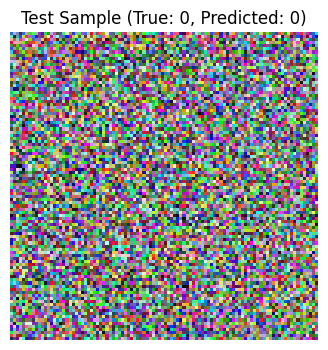

In [24]:
# --- CELL 11: Visualize the Predicted Image (Matching your CNN.ipynb logic) ---
plt.figure(figsize=(4, 4))
# Note: Since x_test is the un-normalized data, we use x_test[idx2,:] for visualization if it was originally 0-255.
# Since we normalized in place in cell 5, we use the normalized version, but reshape it back to 3D for imshow.
plt.imshow(x_test_norm[idx2, :]) 
plt.title(f"Test Sample (True: {true_class}, Predicted: {predicted_class})")
plt.axis('off')
plt.show()